#  logistic regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
# visulazation liabries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# ignore warning

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/LENOVO/Downloads/titanic_data.csv')

In [4]:
df.shape

(891, 12)

In [5]:
data = pd.read_csv('C:/Users/LENOVO/Downloads/titanic_data.csv')

In [6]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
# check for any other unsuable values 

print(pd.isnull(df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Percentage of female who survived: 1    233
0     81
Name: Survived, dtype: int64
Percentage of males who survived: 0    468
1    109
Name: Survived, dtype: int64


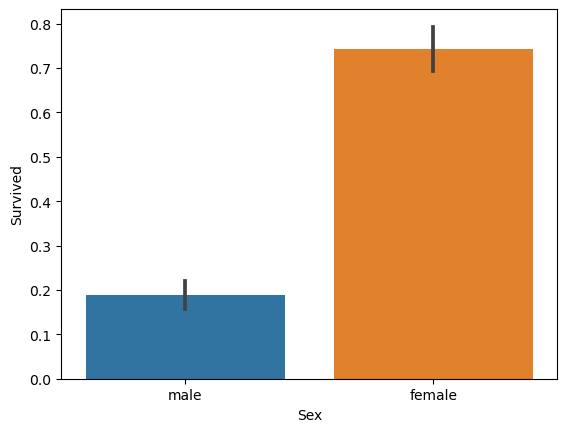

In [10]:
# draw a bar plot of survival by sex 
sns.barplot(x='Sex',y='Survived',data=df)

# print percentage of female vs.males that survive
print('Percentage of female who survived:',df['Survived'][df['Sex']=='female'].value_counts())
print('Percentage of males who survived:',df['Survived'][df['Sex']=='male'].value_counts())

Precentage of female who survived: 1    233
0     81
Name: Survived, dtype: int64
Percentage of male who survived: 0    468
1    109
Name: Survived, dtype: int64


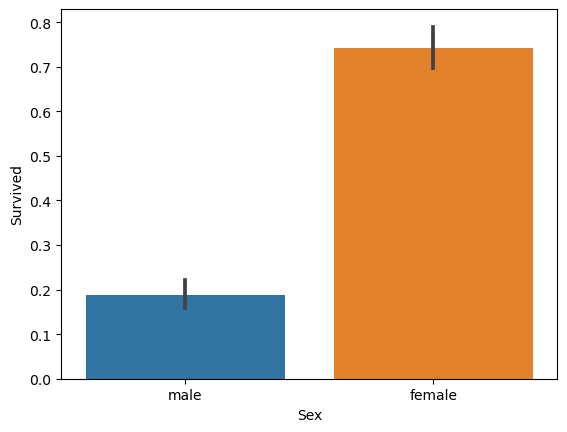

In [11]:
# draw a bar plot of survived by sex 
sns.barplot(x='Sex',y='Survived',data=df)

# print percentage of females vs.males that survived 
print('Precentage of female who survived:',df['Survived'][df['Sex']=='female'].value_counts())
print('Percentage of male who survived:',df['Survived'][df['Sex']=='male'].value_counts())

Percentage of Pclass =1 who survived: 62.96296296296296
Precentage of Pclass = 2 who survived: 47.28260869565217
Precentage of Pclass = 3 who survived: 24.236252545824847


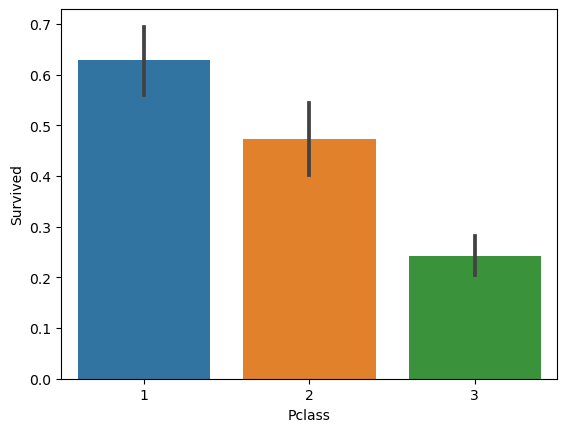

In [12]:
# draw a bar plot of survival by sPclass

sns.barplot(x='Pclass',y='Survived',data=df)

# print percentage of people by Pclass that survived 
print('Percentage of Pclass =1 who survived:',df['Survived'][df['Pclass']==1].value_counts(normalize=True)[1]*100)

print('Precentage of Pclass = 2 who survived:',df['Survived'][df['Pclass']==2].value_counts(normalize=True)[1]*100)

print('Precentage of Pclass = 3 who survived:',df['Survived'][df['Pclass']==3].value_counts(normalize=True)[1]*100)

Precentage of SibSp=0 who survived: 34.53947368421053
percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


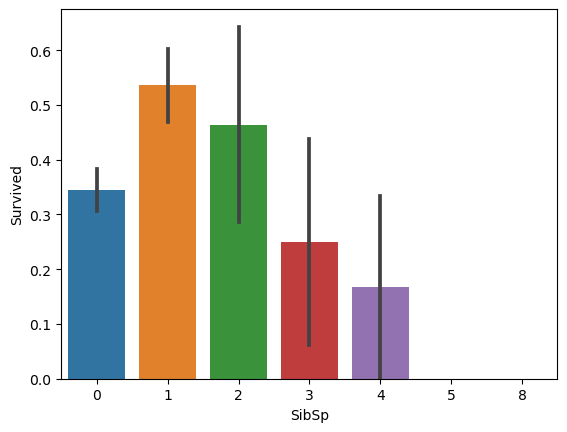

In [13]:
# draw a bar plot for SibSp vs survival 

sns.barplot(x='SibSp',y='Survived',data=df)

# won't be printing individual percentage values for all of these.
print('Precentage of SibSp=0 who survived:',df['Survived'][df['SibSp']==0].value_counts(normalize=True)[1]*100)

print("percentage of SibSp = 1 who survived:",df['Survived'][df['SibSp']==1].value_counts(normalize=True)[1]*100)

print('Percentage of SibSp = 2 who survived:',df['Survived'][df['SibSp']==2].value_counts(normalize=True)[1]*100)

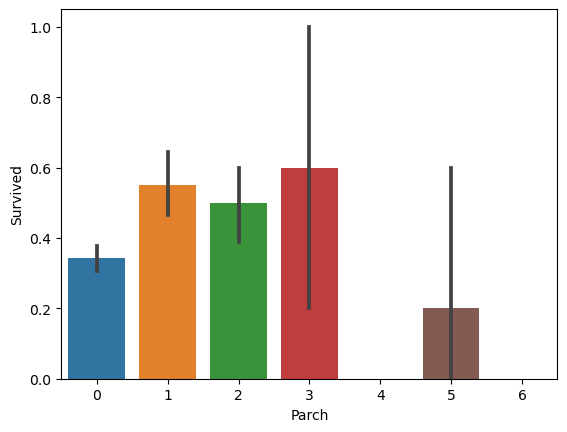

In [14]:
# draw a bar plot for each parch vs. survival 

sns.barplot(x='Parch',y='Survived',data=df)
plt.show()

In [24]:
plt.figure(figsize=(5,5))
df.AgeGroup.value_counts().plot(kind='pie')

AttributeError: 'DataFrame' object has no attribute 'AgeGroup'

<Figure size 500x500 with 0 Axes>

Percentage of cabinbool ==1 who survived: 66.66666666666666
Percentage of cabinbool==0 who survived: 29.985443959243085


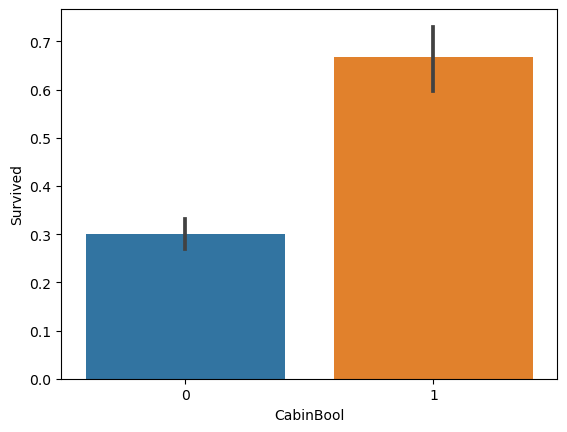

In [16]:
df['CabinBool']=(df['Cabin'].notnull().astype('int'))
# calculate percentage of cabinbool vs.survived 
print('Percentage of cabinbool ==1 who survived:',df['Survived'][df['CabinBool']==1].value_counts(normalize=True)[1]*100)

print('Percentage of cabinbool==0 who survived:',df['Survived'][df['CabinBool']==0].value_counts(normalize=True)[1]*100)

# draw a bar plot of cabinbool vs.survival 
sns.barplot(x='CabinBool',y='Survived',data=df)
plt.show()

In [17]:
data.shape

(891, 12)

In [18]:
data = data.dropna()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [20]:
data = data.drop(['Embarked','Name','Cabin','Ticket'],axis=1)

In [21]:
data ['Sex'] = data['Sex'].map({'male':0,'female':1})


In [23]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(['Survived'],axis=1),
                              data['Survived'],test_size=0.20,
                              random_state=8)

In [25]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [26]:
predictions = logmodel.predict(X_test)
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
809,810,1,1,33.0,1,0,53.1000
137,138,1,0,37.0,1,0,53.1000
496,497,1,1,54.0,1,0,78.2667
659,660,1,0,58.0,0,2,113.2750
3,4,1,1,35.0,1,0,53.1000


In [27]:
accuracy = logmodel.score(X_test,y_test)
print(accuracy*100,'%')

81.08108108108108 %


In [28]:
predictions

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.80      0.91      0.85        22

    accuracy                           0.81        37
   macro avg       0.82      0.79      0.80        37
weighted avg       0.81      0.81      0.81        37



In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[10,  5],
       [ 2, 20]], dtype=int64)